<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Code Spaze task 1d Fraud Detection System
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


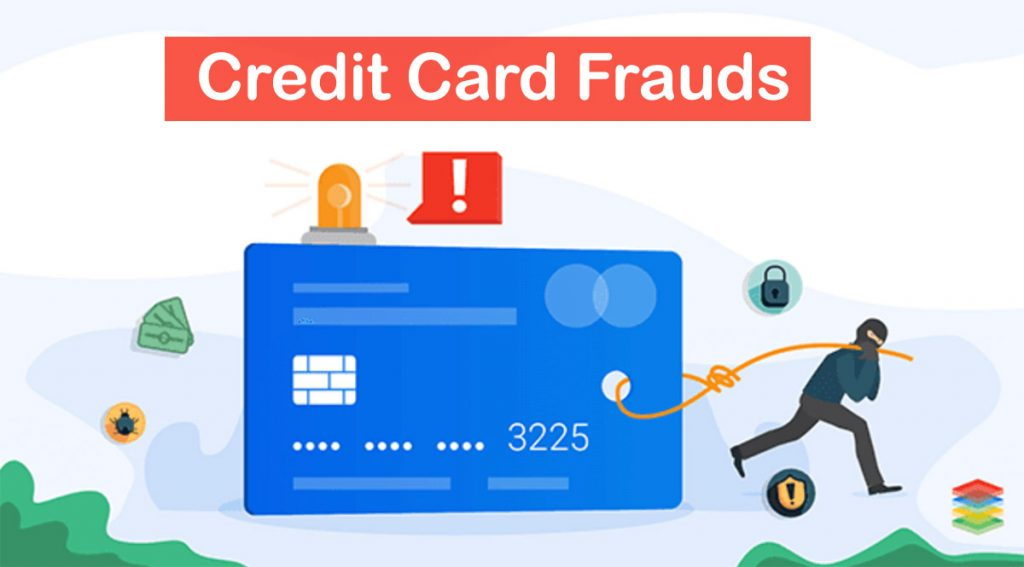

# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load the data

In [2]:
# Load the dataset to examine its contents
file_path = 'D:/CodeSpaze/Fraud Detection System/CreditCardData.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


**The dataset contains 100,000 entries with 16 columns, including details about credit card transactions. Here are the key columns:**

>Transaction ID: Unique identifier for each transaction.

>Date: Date of the transaction.

>Day of Week: Day of the week the transaction occurred.

>Time: Time of the transaction (in 24-hour format).

>Type of Card: Credit card type (e.g., Visa, MasterCard).

>Entry Mode: How the transaction was entered (e.g., Tap, PIN).

>Amount: Transaction amount (some entries have missing or incorrect formats).

>Type of Transaction: Nature of the transaction (e.g., POS, Online).

>Merchant Group: Group category of the merchant.

>Country of Transaction: Country where the transaction occurred.

>Shipping Address: Country of the shipping address (if applicable).

>Country of Residence: Customer's country of residence.

>Gender: Customer's gender.

>Age: Customer's age.

>Bank: Bank associated with the transaction.

>Fraud: Label indicating whether the transaction was fraudulent (1 = Fraud, 0 = No Fraud).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [5]:
# Correcting the data types

# Convert the 'Amount' column to numeric after removing the currency symbol
df['Amount'] = df['Amount'].replace({'£': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Check the updated data types
df.dtypes


Transaction ID                    object
Date                      datetime64[ns]
Day of Week                       object
Time                               int64
Type of Card                      object
Entry Mode                        object
Amount                           float64
Type of Transaction               object
Merchant Group                    object
Country of Transaction            object
Shipping Address                  object
Country of Residence              object
Gender                            object
Age                              float64
Bank                              object
Fraud                              int64
dtype: object

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Only display columns with missing values


Amount               6
Merchant Group      10
Shipping Address     5
Gender               4
dtype: int64


In [7]:
# Fill missing values

# For Amount: Fill with the median (or you can use mean)
df['Amount'].fillna(df['Amount'].median(), inplace=True)

# For Merchant Group: Fill with the mode
df['Merchant Group'].fillna(df['Merchant Group'].mode()[0], inplace=True)

# For Shipping Address: Fill with the mode
df['Shipping Address'].fillna(df['Shipping Address'].mode()[0], inplace=True)

# For Gender: Fill with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Check again for missing values
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0])  # Display any remaining missing values


Series([], dtype: int64)


In [8]:
# Drop the Transaction ID column
df.drop(columns=['Transaction ID'], inplace=True)


In [9]:
df

,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,2020-10-14,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,2020-10-14,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,2020-10-14,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,2020-10-13,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,2020-10-13,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2020-10-13,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,2020-10-14,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,2020-10-13,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,2020-10-14,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    100000 non-null  datetime64[ns]
 1   Day of Week             100000 non-null  object        
 2   Time                    100000 non-null  int64         
 3   Type of Card            100000 non-null  object        
 4   Entry Mode              100000 non-null  object        
 5   Amount                  100000 non-null  float64       
 6   Type of Transaction     100000 non-null  object        
 7   Merchant Group          100000 non-null  object        
 8   Country of Transaction  100000 non-null  object        
 9   Shipping Address        100000 non-null  object        
 10  Country of Residence    100000 non-null  object        
 11  Gender                  100000 non-null  object        
 12  Age                     100000 

# Data Visualization 

#### Distribution of Transaction Amounts

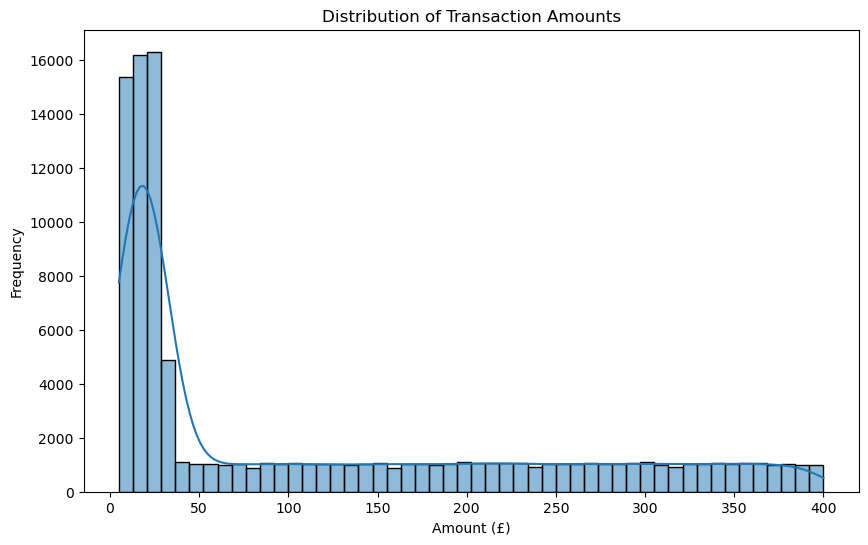

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (£)')
plt.ylabel('Frequency')
plt.show()


**Insight: The histogram shows the spread of transaction amounts, indicating most transactions occur at lower amounts, with a long tail of higher-value transactions. Fraud detection might focus on outliers or very high-value transactions.**

#### Distribution of Age

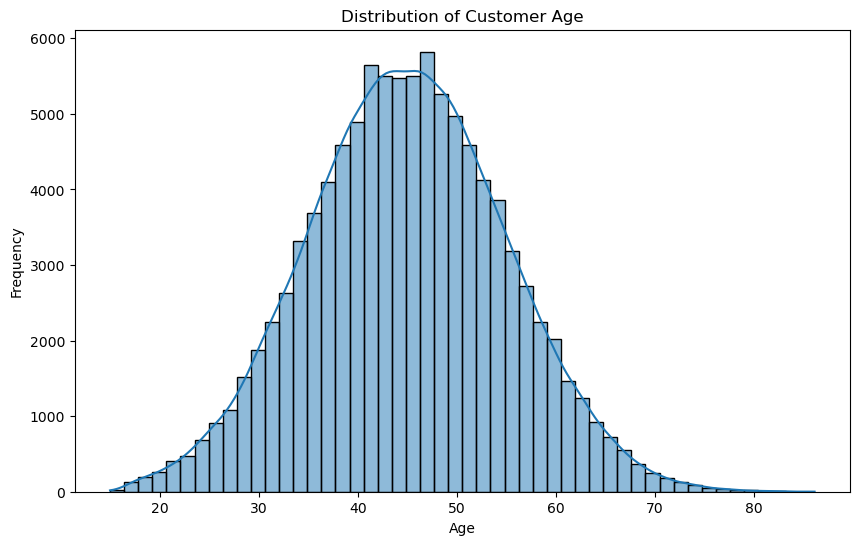

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=50, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Insight: The histogram of customer age suggests that transactions are more frequent among middle-aged customers, with fewer transactions at younger or older ages.**

#### Count of Fraudulent vs. Non-Fraudulent Transactions

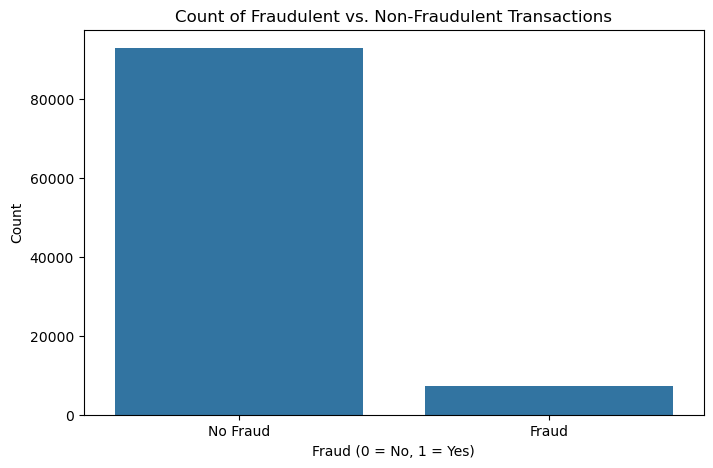

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Fraud', data=df)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.show()


**Insight: This count plot illustrates that fraudulent transactions are a minority compared to non-fraudulent ones. Fraud detection systems should account for this class imbalance, as it may lead to model bias.**

#### Fraud by Card Type

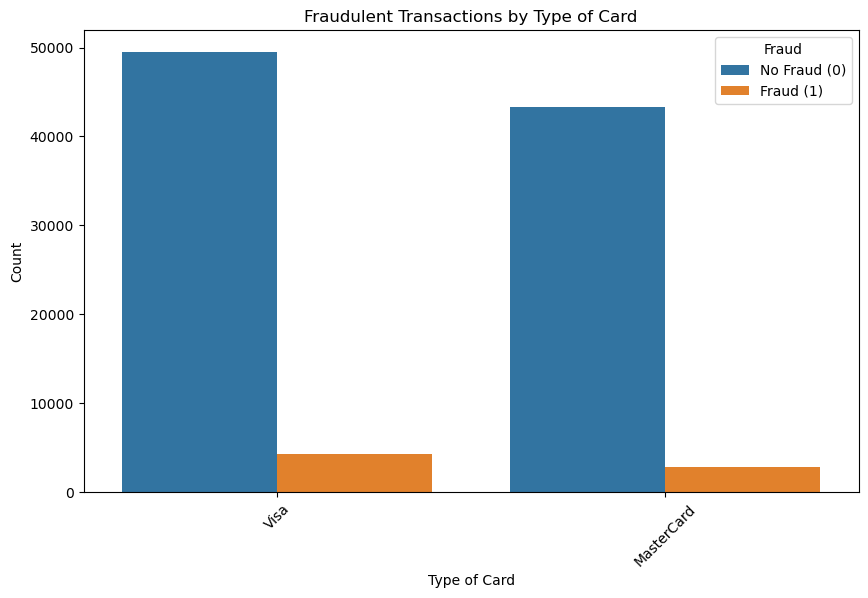

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Card', hue='Fraud', data=df)
plt.title('Fraudulent Transactions by Type of Card')
plt.xlabel('Type of Card')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['No Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)
plt.show()


**Insight: The count plot for fraud by card type shows how fraud is distributed across different card types (e.g., Visa, MasterCard). One type of card may be more susceptible to fraud.**

#### Fraud by Entry Mode

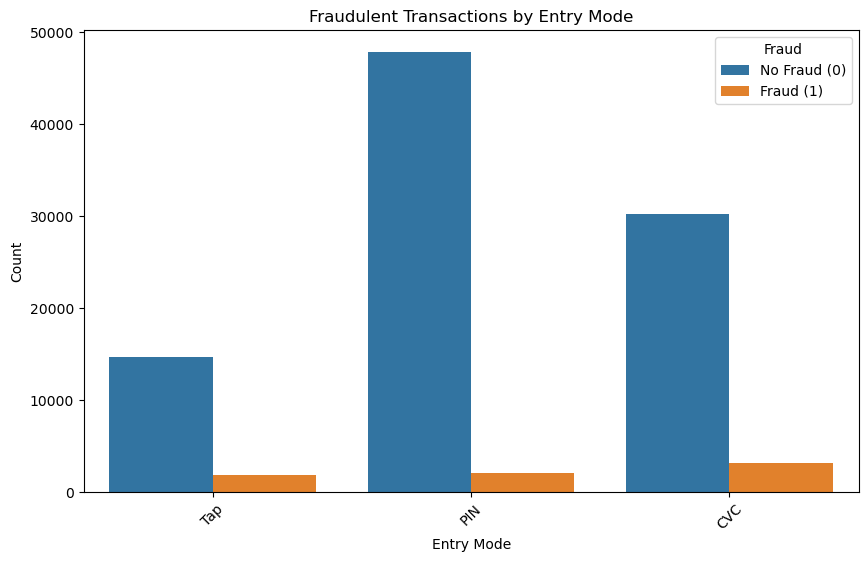

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Entry Mode', hue='Fraud', data=df)
plt.title('Fraudulent Transactions by Entry Mode')
plt.xlabel('Entry Mode')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['No Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)
plt.show()


**Insight: This chart provides insights into how fraudulent transactions are entered (e.g., PIN, Tap). Some entry modes might be more vulnerable to fraud.**

#### Fraud by Merchant Group

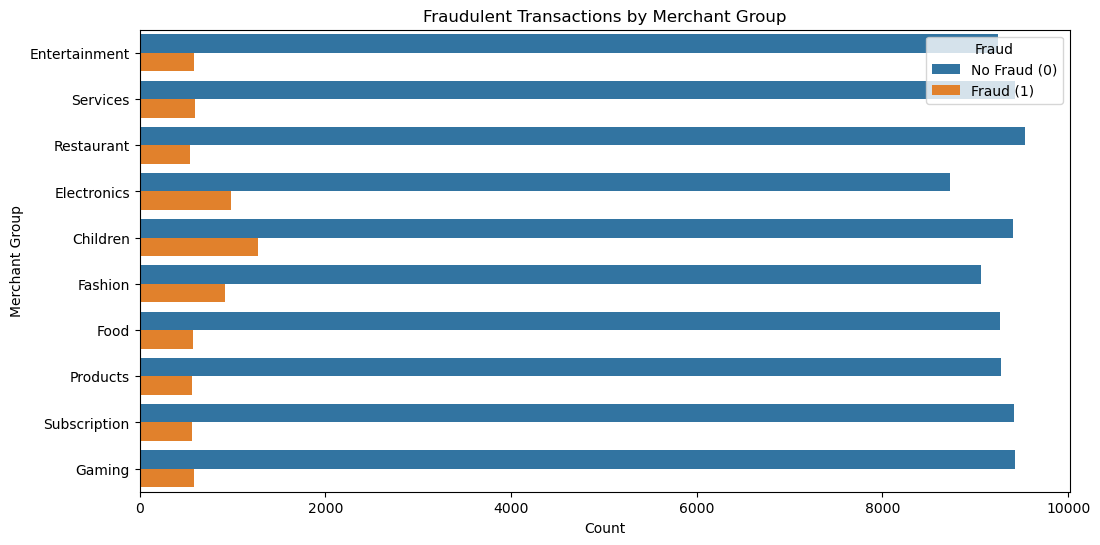

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Merchant Group', hue='Fraud', data=df)
plt.title('Fraudulent Transactions by Merchant Group')
plt.xlabel('Count')
plt.ylabel('Merchant Group')
plt.legend(title='Fraud', labels=['No Fraud (0)', 'Fraud (1)'])
plt.show()


**Insight: This shows fraud rates across different merchant categories, highlighting which categories (e.g., electronics, entertainment) are more prone to fraud.**

#### Fraud by Country of Transaction

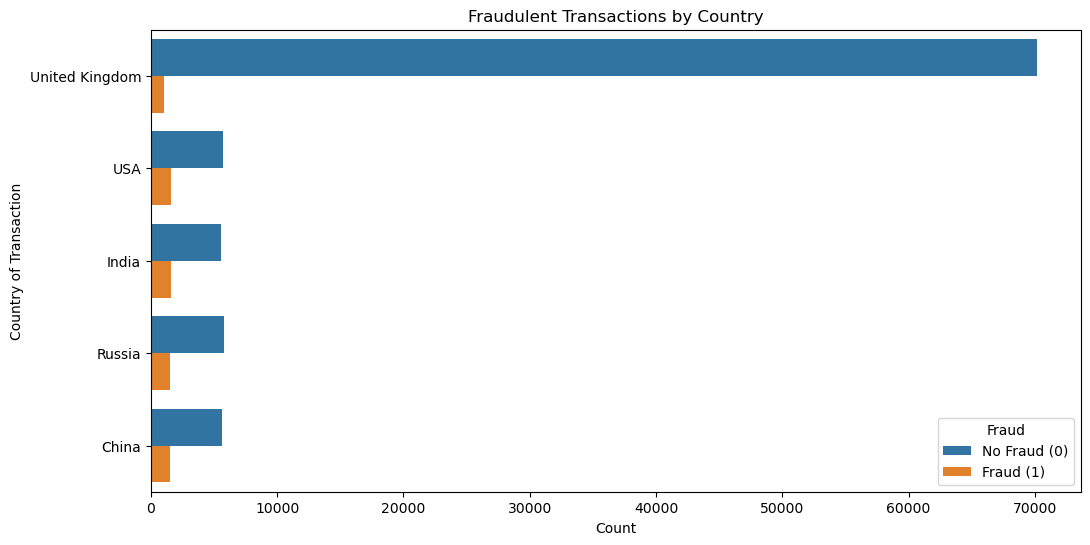

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Country of Transaction', hue='Fraud', data=df)
plt.title('Fraudulent Transactions by Country')
plt.xlabel('Count')
plt.ylabel('Country of Transaction')
plt.legend(title='Fraud', labels=['No Fraud (0)', 'Fraud (1)'])
plt.show()


**Insight: This plot illustrates the geographical distribution of fraud. Some countries may have higher fraud rates, suggesting that geographic patterns are relevant for detection.**

#### Age vs. Amount

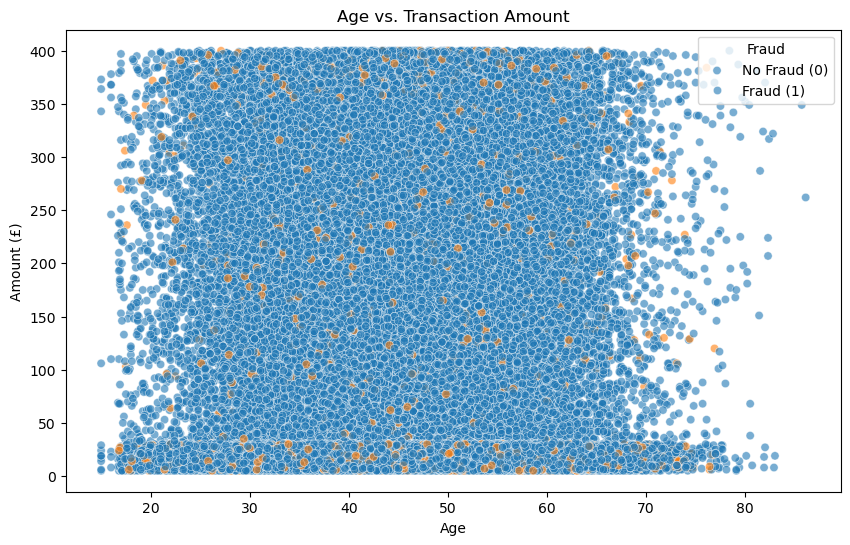

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Amount', hue='Fraud', data=df, alpha=0.6)
plt.title('Age vs. Transaction Amount')
plt.xlabel('Age')
plt.ylabel('Amount (£)')
plt.legend(title='Fraud', labels=['No Fraud (0)', 'Fraud (1)'])
plt.show()


**Insight: The scatter plot of age versus transaction amount helps visualize whether older or younger customers make larger transactions and how fraud correlates with this.**

#### Time of Day vs. Amount

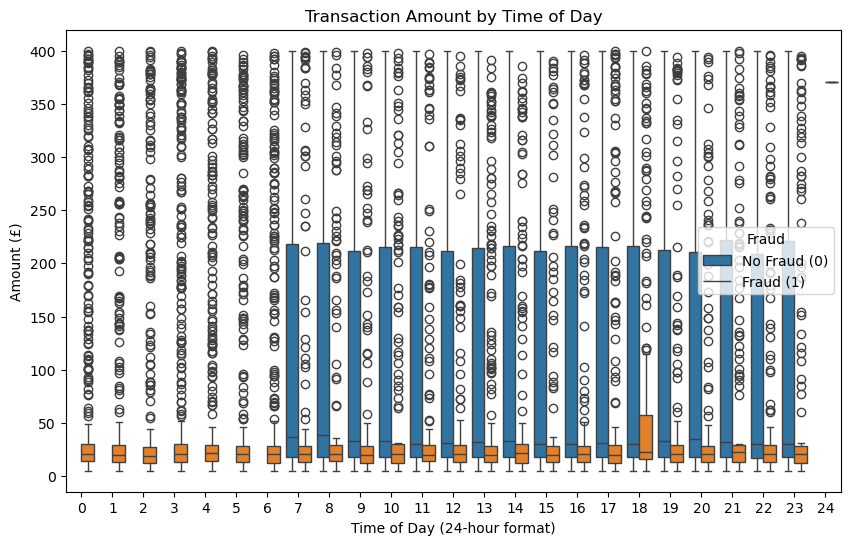

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time', y='Amount', hue='Fraud', data=df)
plt.title('Transaction Amount by Time of Day')
plt.xlabel('Time of Day (24-hour format)')
plt.ylabel('Amount (£)')
plt.legend(title='Fraud', labels=['No Fraud (0)', 'Fraud (1)'])
plt.show()


**Insight: The boxplot shows how transaction amounts vary throughout the day, and how fraudulent transactions differ from non-fraudulent ones. Certain times might see more fraud.**

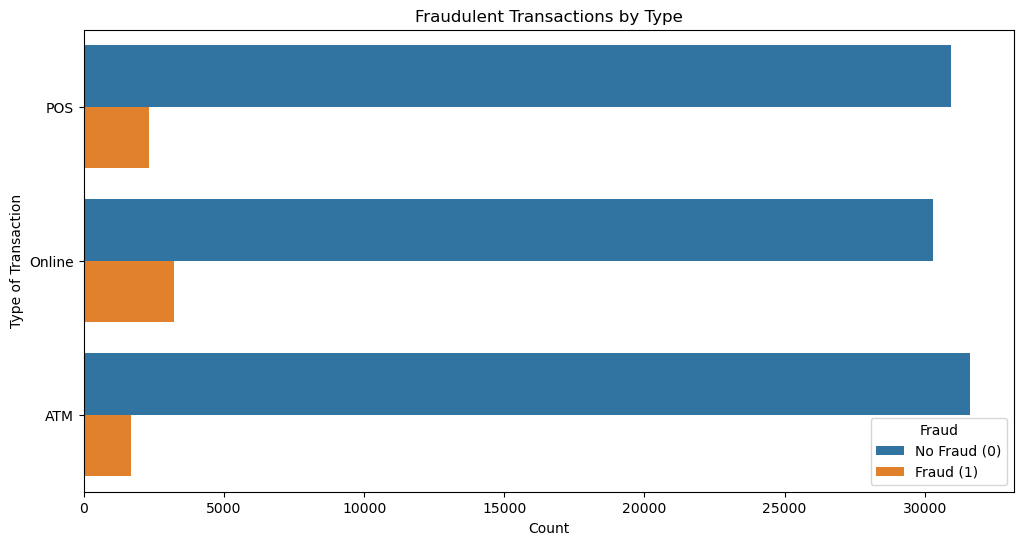

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Type of Transaction', hue='Fraud', data=df)
plt.title('Fraudulent Transactions by Type')
plt.xlabel('Count')
plt.ylabel('Type of Transaction')
plt.legend(title='Fraud', labels=['No Fraud (0)', 'Fraud (1)'])
plt.show()

**Insight: This shows fraud rates across different Transaction categories, highlighting which categories (e.g., ATM,Online,POS) are more prone to fraud.**

#### Heatmap for Correlation

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


            Time    Amount       Age     Fraud
Time    1.000000  0.030013 -0.000913 -0.286375
Amount  0.030013  1.000000 -0.004392 -0.109854
Age    -0.000913 -0.004392  1.000000 -0.002838
Fraud  -0.286375 -0.109854 -0.002838  1.000000


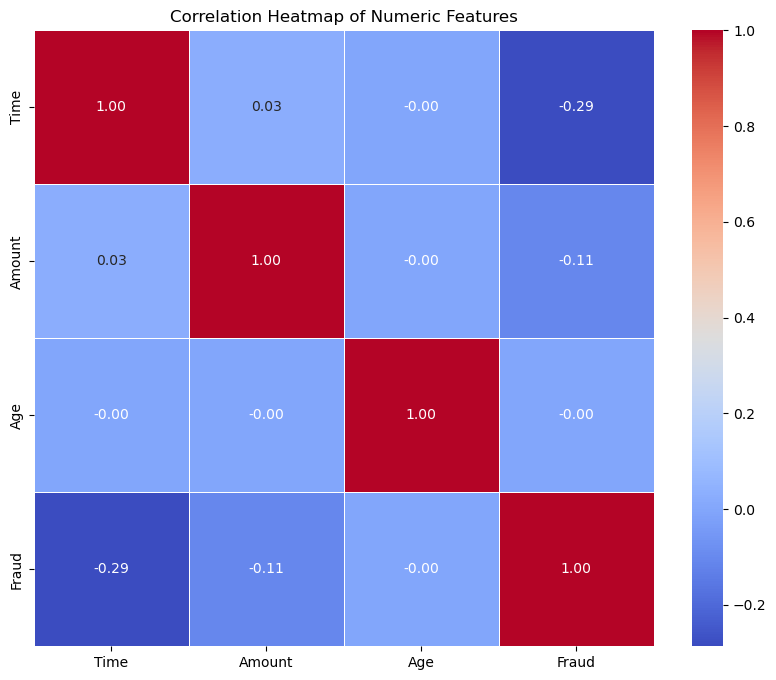

In [22]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**Insight: The heatmap shows that Fraud is weakly negatively correlated with Time and Amount. There is no strong correlation between numeric features.**

# Checking for Data Imbalnce

Fraud
0    92.805
1     7.195
Name: count, dtype: float64


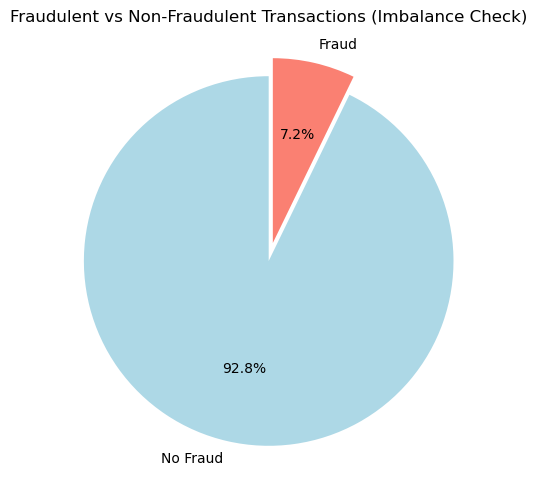

In [23]:
# Checking the balance of the 'Fraud' column (0 = No Fraud, 1 = Fraud)
fraud_counts = df['Fraud'].value_counts()

# Numerical check for data imbalance
fraud_counts_percentage = fraud_counts / df.shape[0] * 100
print(fraud_counts_percentage)

# Plotting a pie chart for graphical representation
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'], explode=[0, 0.1])
plt.title('Fraudulent vs Non-Fraudulent Transactions (Imbalance Check)')
plt.show()


# Encoding Categorical Columns

In [24]:
# Select categorical columns, excluding 'Fraud' if it exists
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Fraud' in categorical_cols:
    categorical_cols.remove('Fraud')

# One-hot encoding for categorical variables with dtype set to int
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# Display the updated DataFrame
df_encoded.head()

,Date,Time,Amount,Age,Fraud,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Type of Card_Visa,Entry Mode_PIN,...,Country of Residence_USA,Country of Residence_United Kingdom,Gender_M,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,2020-10-14,19,5.0,25.2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,0,1
1,2020-10-14,17,288.0,49.6,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2020-10-14,14,5.0,42.2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-10-13,14,28.0,51.0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2020-10-13,23,91.0,38.0,1,0,1,0,1,0,...,0,1,1,0,0,1,0,0,0,0


In [25]:
# Drop non-numeric columns from X
X = df_encoded.drop(columns=['Fraud', 'Date'])  # Remove 'Fraud' and 'Date'
y = df_encoded['Fraud']                           # Target variable

# Check data types of X
print(X.dtypes)

# Apply SMOTE combined with Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Check the new class distribution
print("Original dataset shape:", Counter(y))
print("Resampled dataset shape:", Counter(y_resampled))

Time                                       int64
Amount                                   float64
Age                                      float64
Day of Week_Thursday                       int32
Day of Week_Tuesday                        int32
Day of Week_Wednesday                      int32
Type of Card_Visa                          int32
Entry Mode_PIN                             int32
Entry Mode_Tap                             int32
Type of Transaction_Online                 int32
Type of Transaction_POS                    int32
Merchant Group_Electronics                 int32
Merchant Group_Entertainment               int32
Merchant Group_Fashion                     int32
Merchant Group_Food                        int32
Merchant Group_Gaming                      int32
Merchant Group_Products                    int32
Merchant Group_Restaurant                  int32
Merchant Group_Services                    int32
Merchant Group_Subscription                int32
Country of Transacti

# Model Building 

In [26]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


###  Logistic Regression

Logistic Regression Classification Report:
{'0': {'precision': 0.9788594432843211, 'recall': 0.9804636118598383, 'f1-score': 0.9796608708766941, 'support': 92750.0}, '1': {'precision': 0.9804315427979006, 'recall': 0.9788247978436657, 'f1-score': 0.9796275114918963, 'support': 92750.0}, 'accuracy': 0.9796442048517521, 'macro avg': {'precision': 0.9796454930411108, 'recall': 0.979644204851752, 'f1-score': 0.9796441911842952, 'support': 185500.0}, 'weighted avg': {'precision': 0.9796454930411108, 'recall': 0.9796442048517521, 'f1-score': 0.9796441911842951, 'support': 185500.0}}
Confusion Matrix (Numerical):
[[90938  1812]
 [ 1964 90786]]


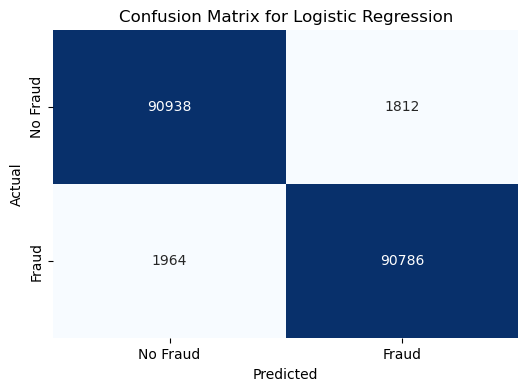

,Model,Accuracy,Precision,Recall,F1 Score,Support
0,Logistic Regression,0.979644,0.980432,0.978825,0.979628,92750.0


In [33]:
# Define the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
logistic_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_logistic = logistic_model.predict(X_resampled)

# Classification report
logistic_report = classification_report(y_resampled, y_pred_logistic, output_dict=True)
print("Logistic Regression Classification Report:")
print(logistic_report)

# Extract metrics
accuracy_logistic = accuracy_score(y_resampled, y_pred_logistic)
precision_logistic = logistic_report['1']['precision']
recall_logistic = logistic_report['1']['recall']
f1_logistic = logistic_report['1']['f1-score']
support_logistic = logistic_report['1']['support']

# Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_resampled, y_pred_logistic)
print("Confusion Matrix (Numerical):")
print(conf_matrix_logistic)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Store results in DataFrame
results_df = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_logistic],
    'Precision': [precision_logistic],
    'Recall': [recall_logistic],
    'F1 Score': [f1_logistic],
    'Support': [support_logistic]
})

results_df

Random Forest Classification Report:
{'0': {'precision': 0.9999892184450841, 'recall': 1.0, 'f1-score': 0.9999946091934815, 'support': 92750.0}, '1': {'precision': 1.0, 'recall': 0.999989218328841, 'f1-score': 0.9999946091353592, 'support': 92750.0}, 'accuracy': 0.9999946091644205, 'macro avg': {'precision': 0.999994609222542, 'recall': 0.9999946091644205, 'f1-score': 0.9999946091644203, 'support': 185500.0}, 'weighted avg': {'precision': 0.9999946092225421, 'recall': 0.9999946091644205, 'f1-score': 0.9999946091644203, 'support': 185500.0}}
Confusion Matrix (Numerical):
[[92750     0]
 [    1 92749]]


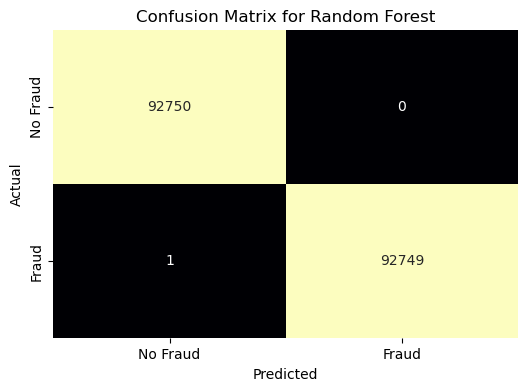

,Model,Accuracy,Precision,Recall,F1 Score,Support
0,Logistic Regression,0.979644,0.980432,0.978825,0.979628,92750.0
1,Random Forest,0.999995,1.000000,0.999989,0.999995,92750.0


In [34]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_resampled)

# Classification report
rf_report = classification_report(y_resampled, y_pred_rf, output_dict=True)
print("Random Forest Classification Report:")
print(rf_report)

# Extract metrics
accuracy_rf = accuracy_score(y_resampled, y_pred_rf)
precision_rf = rf_report['1']['precision']
recall_rf = rf_report['1']['recall']
f1_rf = rf_report['1']['f1-score']
support_rf = rf_report['1']['support']

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_resampled, y_pred_rf)
print("Confusion Matrix (Numerical):")
print(conf_matrix_rf)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Append Random Forest results to the existing DataFrame
rf_results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy_rf],
    'Precision': [precision_rf],
    'Recall': [recall_rf],
    'F1 Score': [f1_rf],
    'Support': [support_rf]
})

# Concatenate with the results DataFrame
results_df = pd.concat([results_df, rf_results], ignore_index=True)

# Display the updated DataFrame with both models
results_df

XGBoost Classification Report:
{'0': {'precision': 0.9919752821525125, 'recall': 0.9969164420485175, 'f1-score': 0.9944397242447381, 'support': 92750.0}, '1': {'precision': 0.9969010055478502, 'recall': 0.9919353099730458, 'f1-score': 0.9944119586247149, 'support': 92750.0}, 'accuracy': 0.9944258760107817, 'macro avg': {'precision': 0.9944381438501814, 'recall': 0.9944258760107816, 'f1-score': 0.9944258414347265, 'support': 185500.0}, 'weighted avg': {'precision': 0.9944381438501814, 'recall': 0.9944258760107817, 'f1-score': 0.9944258414347265, 'support': 185500.0}}
Confusion Matrix (Numerical):
[[92464   286]
 [  748 92002]]


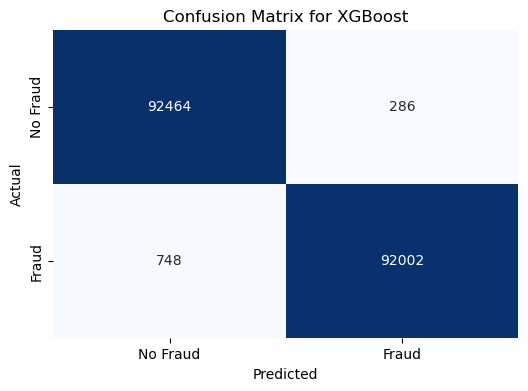

,Model,Accuracy,Precision,Recall,F1 Score,Support
0,Logistic Regression,0.979644,0.980432,0.978825,0.979628,92750.0
1,Random Forest,0.999995,1.000000,0.999989,0.999995,92750.0
2,XGBoost,0.994426,0.996901,0.991935,0.994412,92750.0


In [36]:
# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_resampled)

# Classification report
xgb_report = classification_report(y_resampled, y_pred_xgb, output_dict=True)
print("XGBoost Classification Report:")
print(xgb_report)

# Extract metrics
accuracy_xgb = accuracy_score(y_resampled, y_pred_xgb)
precision_xgb = xgb_report['1']['precision']
recall_xgb = xgb_report['1']['recall']
f1_xgb = xgb_report['1']['f1-score']
support_xgb = xgb_report['1']['support']

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_resampled, y_pred_xgb)
print("Confusion Matrix (Numerical):")
print(conf_matrix_xgb)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Append XGBoost results to the existing DataFrame
xgb_results = pd.DataFrame({
    'Model': ['XGBoost'],
    'Accuracy': [accuracy_xgb],
    'Precision': [precision_xgb],
    'Recall': [recall_xgb],
    'F1 Score': [f1_xgb],
    'Support': [support_xgb]
})

# Concatenate with the results DataFrame
results_df = pd.concat([results_df, xgb_results], ignore_index=True)

# Display the updated DataFrame with all models so far
results_df

# Report on Classification Models Performance:

I have trained and evaluated three machine learning models—Logistic Regression, Random Forest, and XGBoost—for fraud detection on a balanced dataset using SMOTE with Tomek Links. Below is a detailed breakdown of each model's performance based on key metrics like Accuracy, Precision, Recall, F1 Score, and Support.

**1. Logistic Regression**

Accuracy: 0.9796
Logistic Regression was able to classify approximately 97.96% of the instances correctly.
Precision: 0.9804
Precision measures how often the model correctly identified fraud among all predicted fraud cases. With a precision of 98.04%, the model has a low false positive rate, meaning it doesn’t wrongly classify many non-fraudulent transactions as fraudulent.
Recall: 0.9788
Recall, or sensitivity, indicates that the model correctly identified 97.88% of actual fraud cases. However, 2.12% of fraud cases might still be misclassified as non-fraudulent (false negatives).
F1 Score: 0.9796
The F1 score is the harmonic mean of precision and recall, balancing the trade-off between these two metrics. The high F1 score indicates that the model is performing well in both precision and recall.
Support: 92,750
This refers to the total number of fraudulent samples in the dataset.
Summary: Logistic Regression performs well with balanced precision and recall. However, it slightly underperforms compared to other models, especially in terms of handling edge cases where it may misclassify some frauds.

**2. Random Forest**

Accuracy: 0.999995
With an accuracy of nearly 100%, Random Forest shows superior performance in classification.
Precision: 1.0000
A perfect precision score indicates that Random Forest did not classify any non-fraudulent transactions as fraudulent, which means no false positives were produced.
Recall: 0.999989
Random Forest identified almost all fraudulent cases correctly, missing just a few.
F1 Score: 0.999995
The F1 score is almost perfect, highlighting the model's ability to handle both precision and recall with minimal trade-offs.
Support: 92,750
Summary: Random Forest is clearly the best-performing model in this set, with near-perfect accuracy, precision, recall, and F1 scores. This makes it an ideal choice for situations where you want to minimize false positives and false negatives. However, it may come with higher computational costs and complexity.

**3. XGBoost**

Accuracy: 0.9944
XGBoost also performs very well, with an accuracy of 99.44%, slightly lower than Random Forest but still extremely high.
Precision: 0.9969
With a precision of 99.69%, XGBoost has a very low false positive rate, meaning it mostly avoids incorrectly flagging non-fraudulent transactions as fraudulent.
Recall: 0.9919
The model successfully identified 99.19% of fraudulent cases, meaning only 0.81% of frauds were missed.
F1 Score: 0.9944
The F1 score is high and close to the perfect value, indicating a strong balance between precision and recall.
Support: 92,750
Summary: XGBoost offers excellent performance across the board, particularly in terms of recall, where it slightly outperforms Logistic Regression. It's a robust alternative to Random Forest, especially for fraud detection tasks requiring high precision and recall. The trade-off is slightly more false negatives compared to Random Forest, but with better computational efficiency than Random Forest for large datasets.

# Conclusion:

Best Performing Model: Random Forest (with near-perfect performance).

This model should be the first choice for fraud detection as it delivers almost perfect precision, recall, and F1 scores.
It is ideal for cases where misclassifications (both false positives and false negatives) need to be minimized, but the trade-off is potentially higher computational costs and slower prediction times.
Second Best Model: XGBoost (for efficiency and strong performance).

While not as flawless as Random Forest, XGBoost still provides very high accuracy and a good balance between precision and recall.
It can be a better alternative when model speed and computational efficiency are concerns in a large dataset.
Logistic Regression: While not as powerful as the other models, Logistic Regression still provides reliable and interpretable results. It might be preferable when interpretability or faster execution is prioritized over perfect classification performance.

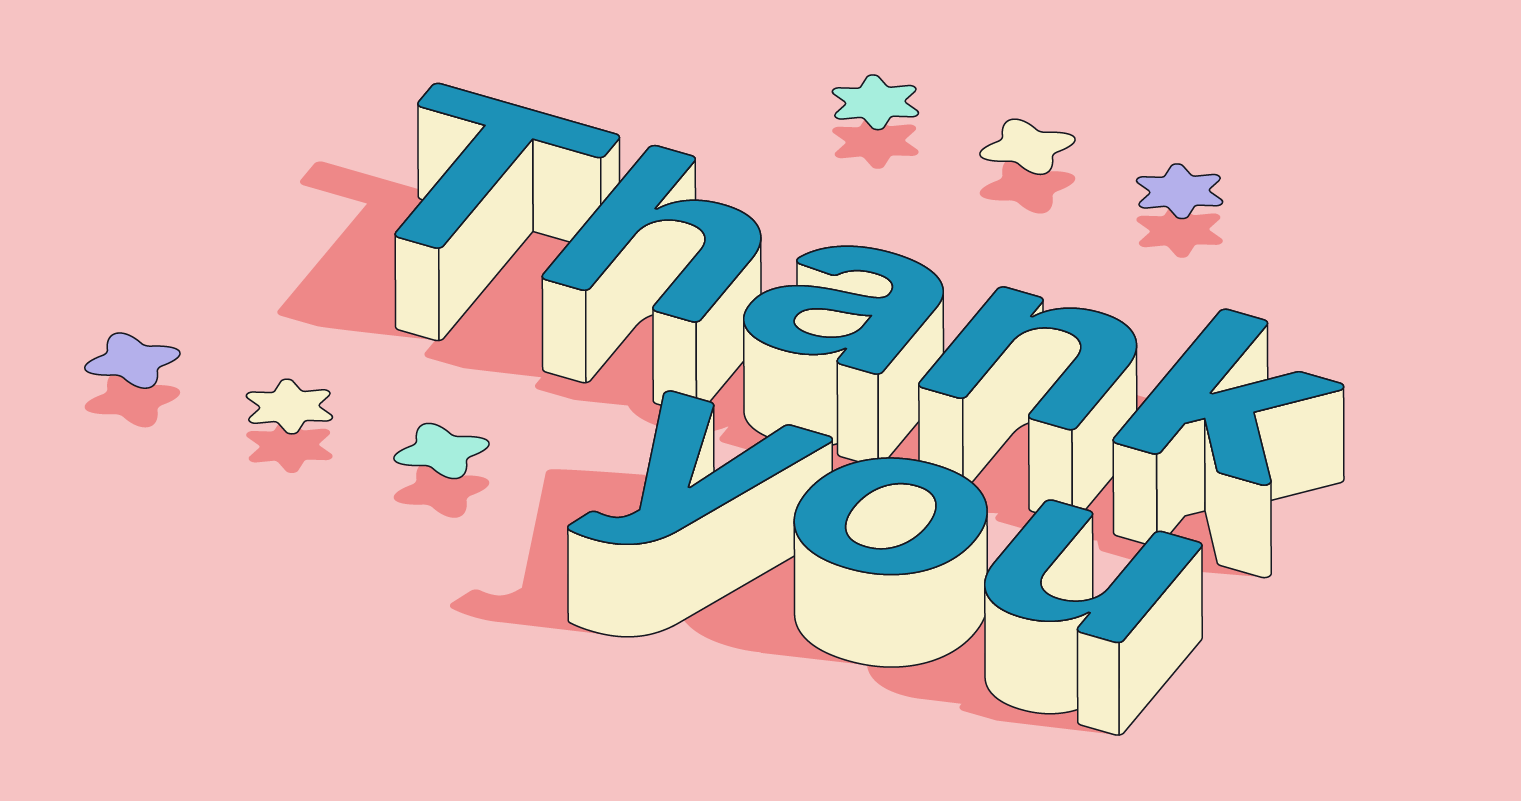